In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import ast
import folium
from folium.plugins import MarkerCluster

In [3]:
# Path to the dataset
dataset_path = '/kaggle/input/yelp-data/'

In [4]:
# Reading Business data into a dataframe
df_business = pd.read_csv(dataset_path + 'yelp_academic_dataset_business.csv')

In [5]:
# Reading Business data into a dataframe
df_review = pd.read_csv(dataset_path + 'yelp_academic_dataset_review.csv')

In [6]:
df_user = pd.read_csv(dataset_path + 'yelp_academic_dataset_user.csv')

In [7]:
territories = pd.read_csv(dataset_path + 'territory_abbr.csv')

In [8]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5996998 entries, 0 to 5996997
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   business_id  object 
 1   cool         int64  
 2   date         object 
 3   funny        float64
 4   review_id    object 
 5   stars        float64
 6   text         object 
 7   useful       float64
 8   user_id      object 
dtypes: float64(3), int64(1), object(5)
memory usage: 411.8+ MB


In [9]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 61 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   address                                180970 non-null  object 
 1   attributes                             0 non-null       float64
 2   attributes.AcceptsInsurance            11671 non-null   object 
 3   attributes.AgesAllowed                 397 non-null     object 
 4   attributes.Alcohol                     47892 non-null   object 
 5   attributes.Ambience                    47577 non-null   object 
 6   attributes.BYOB                        911 non-null     object 
 7   attributes.BYOBCorkage                 1409 non-null    object 
 8   attributes.BestNights                  6844 non-null    object 
 9   attributes.BikeParking                 84891 non-null   object 
 10  attributes.BusinessAcceptsBitcoin      12674 non-null   

In [10]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518169 entries, 0 to 1518168
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   average_stars       1518169 non-null  float64
 1   compliment_cool     1518169 non-null  int64  
 2   compliment_cute     1518169 non-null  int64  
 3   compliment_funny    1518169 non-null  int64  
 4   compliment_hot      1518169 non-null  int64  
 5   compliment_list     1518169 non-null  int64  
 6   compliment_more     1518169 non-null  int64  
 7   compliment_note     1518169 non-null  int64  
 8   compliment_photos   1518169 non-null  int64  
 9   compliment_plain    1518169 non-null  int64  
 10  compliment_profile  1518169 non-null  int64  
 11  compliment_writer   1518169 non-null  int64  
 12  cool                1518169 non-null  int64  
 13  elite               67109 non-null    object 
 14  fans                1518169 non-null  int64  
 15  friends        

In [11]:
df_review.head(10)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0.0,x7mDIiDB3jEiPGPHOmDzyw,2.0,The pizza was okay. Not the best I've had. I p...,0.0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0.0,dDl8zu1vWPdKGihJrwQbpw,5.0,I love this place! My fiance And I go here atl...,0.0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1.0,LZp4UX5zK3e-c5ZGSeo3kA,1.0,Terrible. Dry corn bread. Rib tips were all fa...,3.0,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0.0,Er4NBWCmCD4nM8_p1GRdow,2.0,Back in 2005-2007 this place was my FAVORITE t...,2.0,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0.0,jsDu6QEJHbwP2Blom1PLCA,5.0,Delicious healthy food. The steak is amazing. ...,0.0,msQe1u7Z_XuqjGoqhB0J5g
5,vgfcTvK81oD4r50NMjU2Ag,0,2011-02-25,0.0,pfavA0hr3nyqO61oupj-lA,1.0,This place sucks. The customer service is horr...,2.0,msQe1u7Z_XuqjGoqhB0J5g
6,AxeQEz3-s9_1TyIo-G7UQw,0,2011-10-10,0.0,brokEno2n7s4vrwmmUdr9w,5.0,"If you like Thai food, you have to try the ori...",1.0,msQe1u7Z_XuqjGoqhB0J5g
7,zdE82PiD6wquvjYLyhOJNA,0,2012-04-18,1.0,kUZWBVZvhWuC8TWUg5AYyA,5.0,AMAZING!!!\n\n I was referred here by a friend...,0.0,msQe1u7Z_XuqjGoqhB0J5g
8,EAwh1OmG6t6p3nRaZOW_AA,0,2011-02-25,0.0,wcqt0III88LEcm19IxFFyA,4.0,Ribs = amazing\n2 hour wait time= not so amazi...,0.0,msQe1u7Z_XuqjGoqhB0J5g
9,atVh8viqTj-sqDJ35tAYVg,1,2012-11-09,2.0,LWUtqzNthMM3vpWZIFBlPw,2.0,"Food is pretty good, not gonna lie. BUT you ha...",1.0,msQe1u7Z_XuqjGoqhB0J5g


In [12]:
df_user.head(10)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,2.00,0,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,Susan,1,0,lzlZwIpuSWXEnNS91wxjHw,2015-09-28
1,5.00,0,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,Daipayan,2,0,XvLBr-9smbI0m_a7dXtB7w,2015-09-05
2,4.00,0,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,Andy,1,0,QPT4Ud4H5sJVr68yXhoWFw,2016-07-21
3,4.05,0,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,Jonathan,19,0,i5YitlHZpf0B3R0s_8NVuw,2014-08-04
4,3.00,0,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,Shashank,3,0,s4FoIXE_LSGviTHBe8dmcg,2017-06-18
5,5.00,0,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,Stacey X Joe,3,0,ZcsZdHLiJGVvDHVjeTYYnQ,2014-08-27
6,5.00,0,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,Lindsay,2,0,h3p6aeVL7vrafSOM50SsCg,2016-02-02
7,5.00,0,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,Joshua,1,0,EbJMotYYkq-iq-v1u8wCYA,2013-03-20
8,2.77,0,0,0,0,0,0,0,0,0,...,0,NaN,1,NaN,0,Mike,11,8,nnB0AE1Cxp_0154xkhXelw,2014-07-11
9,4.00,0,0,0,0,0,0,0,0,0,...,1,NaN,0,NaN,3,Mitch,4,2,XoEnrhtJc2pcdlQ09d8Oug,2013-04-07


In [13]:
df_business['is_open'].value_counts()

is_open
1    156606
0     31987
Name: count, dtype: int64

## 1. Do businesses with more reviews tend to have higher ratings?

In [14]:
# Checking correlation between review_count and stars
correlation = df_business['review_count'].corr(df_business['stars'])
correlation

0.03241331330172571

the correlation coefficient is close to zero, which suggests a very weak positive linear relationship between review_count and stars. This means that there is a slight tendency for the two variables to increase together, but the relationship is not strong.

In [15]:
# Using groupby function to 
ratings_reviews=df_business.groupby(by='stars',as_index=False)['review_count'].count()
ratings_reviews

,stars,review_count
0,1.0,4343
1,1.5,4727
2,2.0,10266
3,2.5,17808
4,3.0,24704
5,3.5,33974
6,4.0,35123
7,4.5,26707
8,5.0,30941


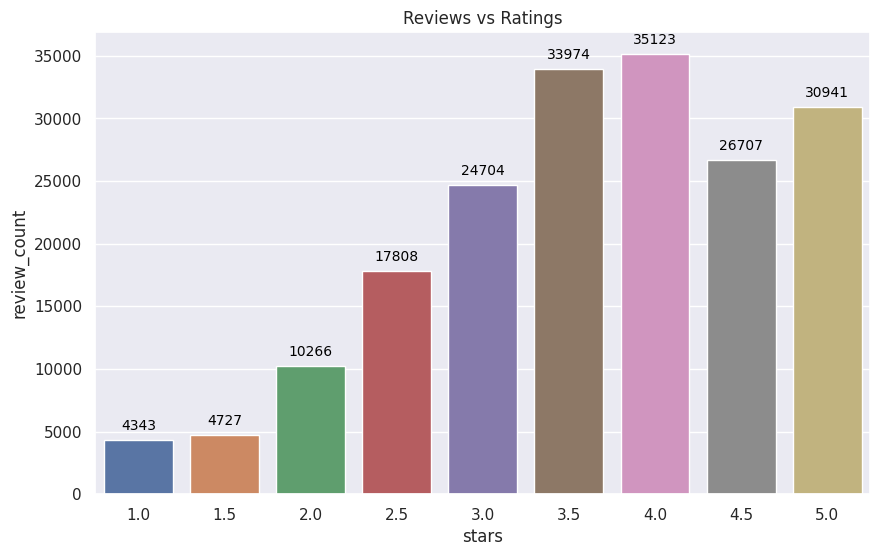

In [16]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Ctreating a borplot
ax = sns.barplot(x='stars', y='review_count', data=ratings_reviews)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

# Adding title to the plot
plt.title('Reviews vs Ratings')
plt.show()

* **Most businesses have positive ratings:**<br>
 The majority of the businesses fall in the 3.5-4.5 star range, indicating that most Yelp reviewers had positive experiences.
* **There are a few businesses with a lot of reviews:**<br>
 The bars at the higher end of the X-axis are taller, suggesting that some businesses have received many reviews. This could be due to their popularity, good reputation, or involvement in recent controversies.
* **The distribution of ratings is not perfectly symmetrical:**<br>
 There are slightly more businesses with 4.0-4.5 star ratings than 3.0-3.5 star ratings. This suggests that a slightly higher proportion of reviewers give out very positive ratings compared to slightly negative ratings.

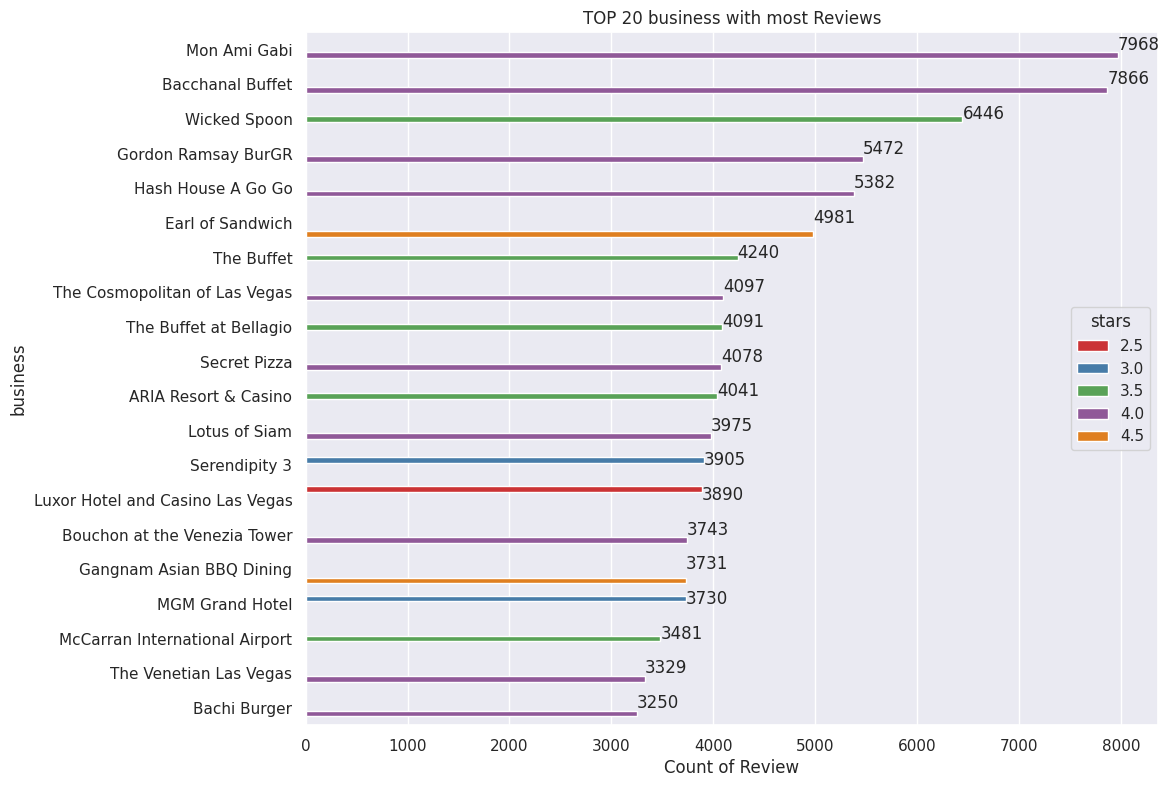

In [17]:
plt.figure(figsize=(11,9))
grouped = df_business[['name','review_count','stars']].sort_values(by='review_count', ascending=False)[:20]

sns.barplot(x=grouped.review_count, y = grouped.name,hue=grouped.stars, palette=sns.color_palette("Set1", len(grouped)), errorbar=None)
plt.xlabel('Count of Review')
plt.ylabel('business')

# Adding title to the plot
plt.title('TOP 20 business with most Reviews')
for  i, v in enumerate(grouped.review_count):
    plt.text(v, i, str(v))

* The majority of businesses listed have an average star rating of 4.0, suggesting that they are well-regarded establishments.
 
* Mon Ami Gabi stands out as the business with the most reviews, totaling around 7,968. It has an average star rating of 4.0

* It seems that businesses with a higher number of reviews tend to have a higher average star rating, though this is not a strict rule as seen with the airport and some other businesses.

## 2. Is there a difference in the rating distribution (stars) of food establishments by state?

In [18]:
territories.rename(columns={'Abbreviation': 'state'}, inplace=True)
territories

,State,state
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,District of Columbia,DC
9,Florida,FL


In [19]:
result_rows = []

for index, row in df_business.iterrows():
    categories_list = str(row['categories']).split(',')
    for category in categories_list:
        if "Food" in category:
            result_rows.append(row.to_dict())
            break

us_restaurants = pd.DataFrame(result_rows)

In [20]:
us_restaurants12 = pd.merge(territories, us_restaurants, on='state', how='inner')

In [21]:
us_restaurants12['state'].unique()

array(['AL', 'AZ', 'CO', 'FL', 'IL', 'IN', 'NV', 'NY', 'NC', 'OH', 'OR',
       'PA', 'SC', 'VA', 'WI'], dtype=object)

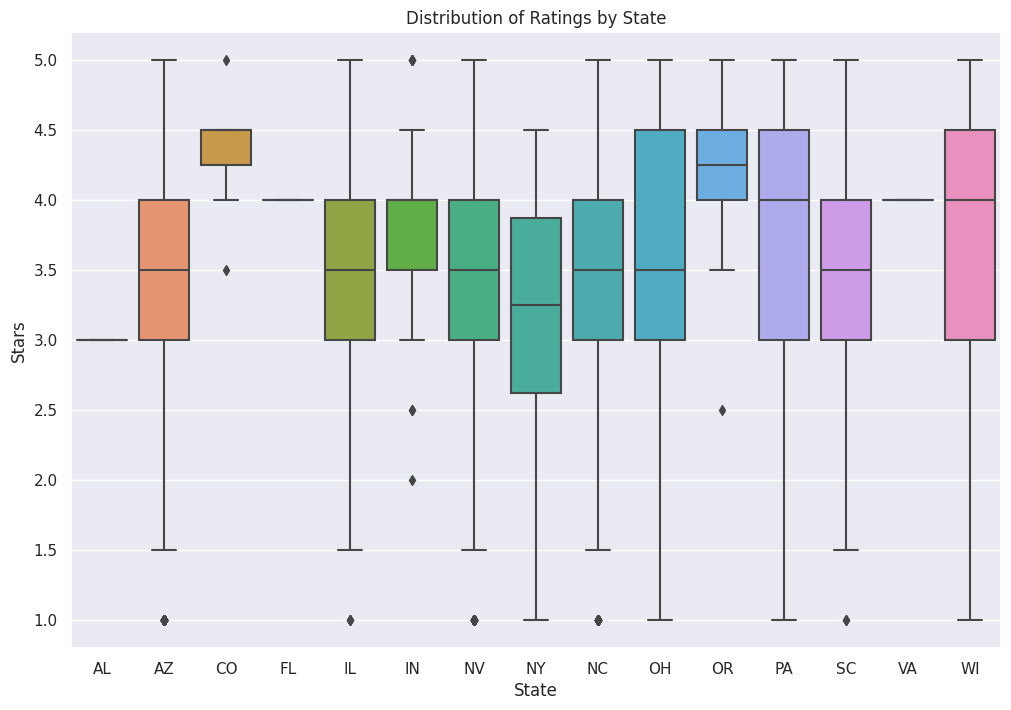

In [22]:
# Box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='state', y='stars', data=us_restaurants12)
plt.title('Distribution of Ratings by State')
plt.xlabel('State')
plt.ylabel('Stars')
plt.show()

* **Most states lean towards positive ratings:**<br>
The majority of states have a higher concentration of food establishments with higher star ratings (4 and above), suggesting that overall, Americans are generally satisfied with their dining experiences.

* **Some states stand out:**<br>
Certain states might have distinct peaks at specific star ratings, indicating potential trends or preferences in those regions. For instance, California might have a larger cluster at 4.5 stars, suggesting a focus on fine dining or gourmet experiences.

## 3. Investigate differences in food establishments with/without a Happy Hour using an appropriate visualization


In [23]:
happy_hour_places = us_restaurants12[(us_restaurants12['attributes.HappyHour'] == True)]
non_happy_hour_places = us_restaurants12[(us_restaurants12['attributes.HappyHour'] == False)]


In [24]:

top_25_happy_hour = happy_hour_places.sort_values(by='stars', ascending=False).head(25)
top_25_non_happy_hour = non_happy_hour_places.sort_values(by='stars', ascending=False).head(25)

print("Top 25 Best-Rated Places with Happy Hour:")
top_25_happy_hour[['name', 'stars', 'attributes.HappyHour']]

Top 25 Best-Rated Places with Happy Hour:


,name,stars,attributes.HappyHour
19577,Perspolis Hookah Lounge,5.0,True
17584,Lake City Tavern,5.0,True
16220,Highland Hops and Vines,5.0,True
16141,49 Street Tavern,5.0,True
4187,The Refuge Coffee & Wine,5.0,True
13515,The Cellar at Corkbuzz,5.0,True
10521,Assa Karaoke,5.0,True
6301,Axis Hookah Lounge,5.0,True
16910,Legacy Cafe And Lounge,5.0,True
18668,Wigle Whiskey Tasting Room and Bottle Shop,5.0,True


In [25]:
print("Top 25 Best-Rated Places without Happy Hour:")
top_25_non_happy_hour[['name', 'stars', 'attributes.HappyHour']]

Top 25 Best-Rated Places without Happy Hour:


,name,stars,attributes.HappyHour
13209,Bottled & Tapped,5.0,False
16809,dabu,5.0,False
5575,Kings Beer & Wine,5.0,False
21582,Growlers To Go-Go,5.0,False
14522,Cornelius Drafthouse,5.0,False
1235,Arizona Mead Company,5.0,False
9497,AA Hookah Pipe & Vape,5.0,False
13898,Cabo Winery,5.0,False
2208,Turquoise Bar @ The Andaz,5.0,False
12436,VIP Sushi and Karaoke,5.0,False


/tmp/ipykernel_47/2930684203.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happy_hour_places['Ambience Types'] = happy_hour_places['attributes.Ambience'].apply(extract_ambience_types)
/tmp/ipykernel_47/2930684203.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_happy_hour_places['Ambience Types'] = non_happy_hour_places['attributes.Ambience'].apply(extract_ambience_types)


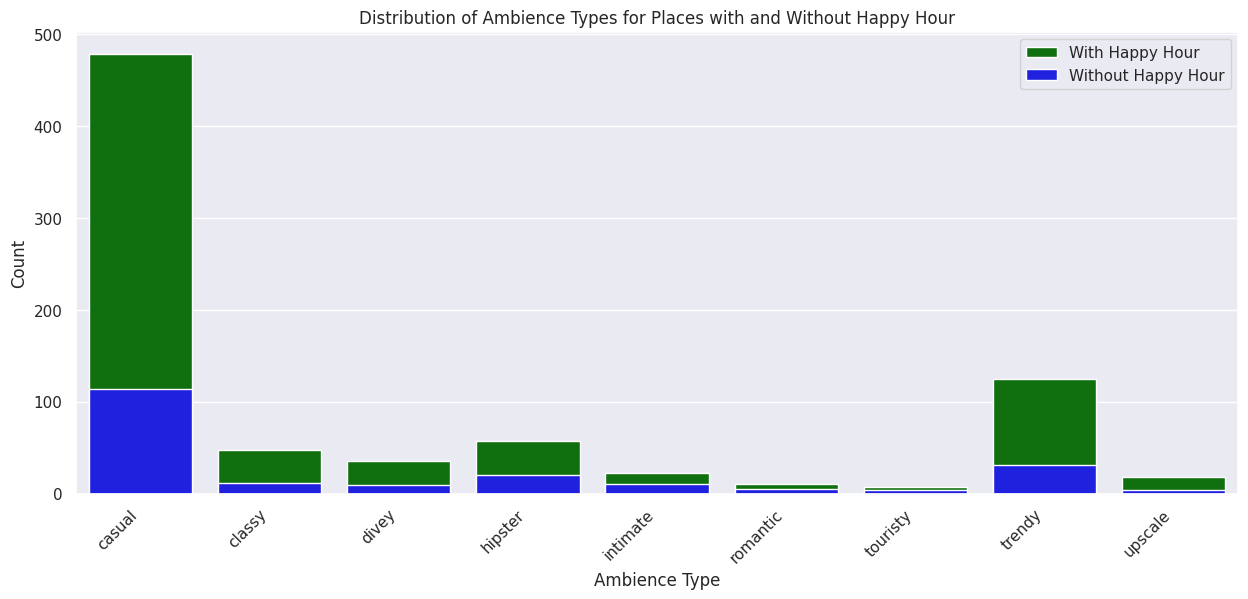

In [26]:
def extract_ambience_types(ambience_string):
    if pd.isnull(ambience_string):
        return []
    ambience_dict = ast.literal_eval(ambience_string)
    return [key for key, value in ambience_dict.items() if value]

# Apply the function to create new columns with lists of ambience types
happy_hour_places['Ambience Types'] = happy_hour_places['attributes.Ambience'].apply(extract_ambience_types)
non_happy_hour_places['Ambience Types'] = non_happy_hour_places['attributes.Ambience'].apply(extract_ambience_types)

# Count the occurrences of each ambience type for both categories
happy_hour_ambience_counts = (
    pd.Series(happy_hour_places['Ambience Types'].explode())
    .value_counts()
    .sort_index()
)

non_happy_hour_ambience_counts = (
    pd.Series(non_happy_hour_places['Ambience Types'].explode())
    .value_counts()
    .sort_index()
)

# Create a DataFrame for the counts
data12 = pd.DataFrame({
    'With Happy Hour': happy_hour_ambience_counts,
    'Without Happy Hour': non_happy_hour_ambience_counts
})

# Plot the grouped bar chart
plt.figure(figsize=(15, 6))
sns.barplot(x=data12.index, y='With Happy Hour', data=data12, color='green', label='With Happy Hour')
sns.barplot(x=data12.index, y='Without Happy Hour', data=data12, color='blue', label='Without Happy Hour')
plt.title('Distribution of Ambience Types for Places with and Without Happy Hour')
plt.xlabel('Ambience Type')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

* Casual Ambience:<br>
The majority of places with a casual ambience offer happy hour. The count for places with happy hour is significantly higher than those without.

* Classy, Divey, Hipster, Intimate, Romantic, Touristy:<br>
For these ambience types, the number of places with happy hour is generally low, with the count of those without happy hour being either very close or equal to those with happy hour.
 
* Trendy Ambience:<br>
This category is not represented for places without happy hour, meaning all trendy places seem to offer happy hour.
 
* Upscale Ambience:<br>
A notable number of upscale places offer happy hour, but none without happy hour is shown on the graph.

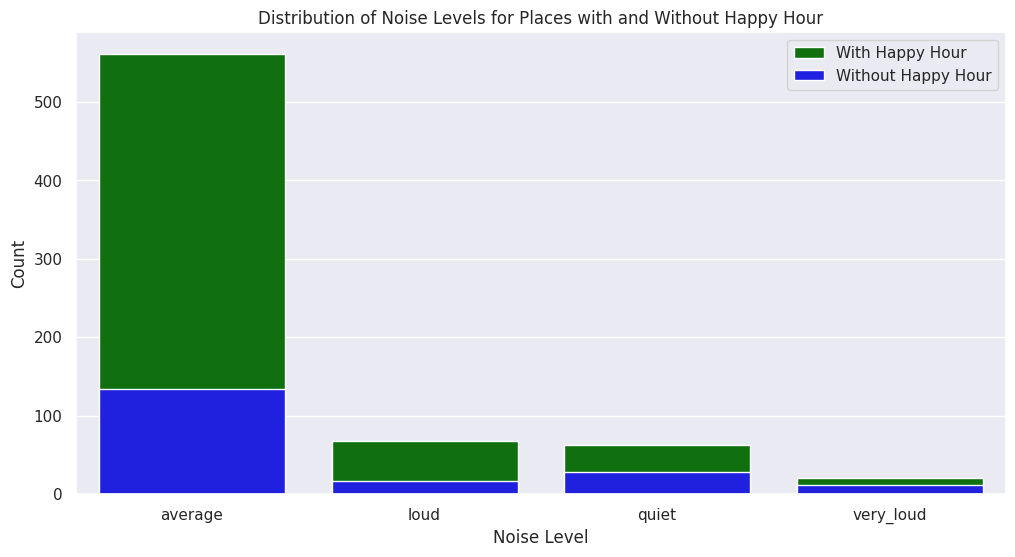

In [27]:
happy_hour_noise_level_counts = happy_hour_places['attributes.NoiseLevel'].value_counts().sort_index()
non_happy_hour_noise_level_counts = non_happy_hour_places['attributes.NoiseLevel'].value_counts().sort_index()

# Create a DataFrame for the counts
data23 = pd.DataFrame({
    'With Happy Hour': happy_hour_noise_level_counts,
    'Without Happy Hour': non_happy_hour_noise_level_counts
})

# Plot the grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=data23.index, y='With Happy Hour', data=data23, color='green', label='With Happy Hour')
sns.barplot(x=data23.index, y='Without Happy Hour', data=data23, color='blue', label='Without Happy Hour')
plt.title('Distribution of Noise Levels for Places with and Without Happy Hour')
plt.xlabel('Noise Level')
plt.ylabel('Count')
plt.legend()
plt.show()



This graph presents the distribution of noise levels for places with and without happy hour. The noise levels are categorized as 'average', 'loud', 'quiet', and 'very loud'. Here are some observations:

* Average Noise Level:<br>
The most common noise level for places with a happy hour is 'average', with a significantly higher count than places without a happy hour.
 
* Loud Noise Level: <br>
Places with a happy hour also have a higher count of 'loud' noise levels compared to places without happy hour, though the difference is not as pronounced as with 'average' noise levels.
 
* Quiet Noise Level: <br>
There are more places without happy hour that have a 'quiet' noise level than those with happy hour.
 
* Very Loud Noise Level: <br>
A very small number of places without happy hour have a 'very loud' noise level, while there are none with a happy hour in this category.

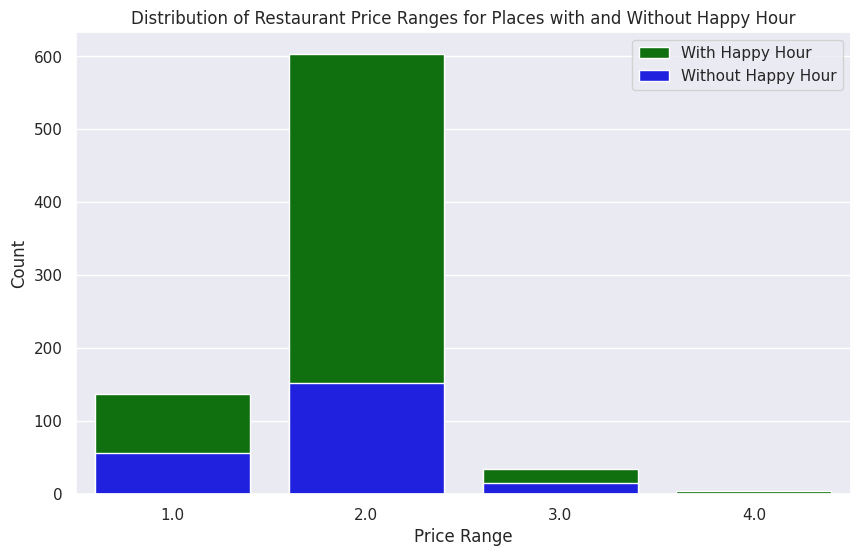

In [28]:
# Count the occurrences of each price range for both categories
happy_hour_price_range_counts = happy_hour_places['attributes.RestaurantsPriceRange2'].value_counts().sort_index()
non_happy_hour_price_range_counts = non_happy_hour_places['attributes.RestaurantsPriceRange2'].value_counts().sort_index()

# Create a DataFrame for the counts
data34 = pd.DataFrame({
    'With Happy Hour': happy_hour_price_range_counts,
    'Without Happy Hour': non_happy_hour_price_range_counts
})

# Sort the index if it contains NaN
data = data34.sort_index(na_position='first')

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=data34.index.astype(str), y='With Happy Hour', data=data34, color='green', label='With Happy Hour')
sns.barplot(x=data34.index.astype(str), y='Without Happy Hour', data=data34, color='blue', label='Without Happy Hour')
plt.title('Distribution of Restaurant Price Ranges for Places with and Without Happy Hour')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend()
plt.show()

* Price Range 1.0:<br>
There are a significant number of places with happy hour in the lowest price range, but the count for places without happy hour is lower. This suggests that more affordable places are likely to offer happy hour specials.
 
* Price Range 2.0:<br> 
The graph shows a very high count of places with happy hour in this price range, dwarfing the number of places without happy hour. This indicates that mid-range priced restaurants are the most common to offer happy hour.

* Price Range 3.0:<br> 
Only a small number of places with happy hour fall into this price range, and an even smaller number of places without happy hour are in this category.
 
* Price Range 4.0: <br>
There are a minimal number of places with happy hour in this highest price category, and none are shown without happy hour.
<br>
The data strongly suggests that happy hour is a popular offering at more affordably priced restaurants, with the greatest concentration in the mid-price range. It becomes less common as the price range increases, indicating that higher-priced establishments are less likely to offer happy hour specials. 

In [29]:
map_center = [happy_hour_places['latitude'].mean(), happy_hour_places['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=5)

# Create a marker cluster group for better visualization of multiple markers
marker_cluster = MarkerCluster().add_to(mymap)

# Add markers for each place with happy hour
for index, row in happy_hour_places.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name'],  # You can customize the popup content
    ).add_to(marker_cluster)

# Save the map as an HTML file or display it in a Jupyter notebook
mymap.save("happy_hour_map.html")
# OR
# mymap


In [30]:
print("places with happy hour in the USA")
display(mymap)

places with happy hour in the USA


# 4

In [31]:
best_restaurants = pd.DataFrame(columns=us_restaurants12.columns)

# Group by city and find the restaurant with the highest stars rating and the largest total number of reviews
for city, group in us_restaurants12.groupby('city'):
    best_in_city = group.loc[(group['stars'] == group['stars'].max()) & (group['review_count'] == group['review_count'].max())]
    best_restaurants = pd.concat([best_restaurants, best_in_city])

# Display the result
print('the best food place in each city: ')
best_restaurants[["city","name", "stars", "review_count"]]

the best food place in each city: 


,city,name,stars,review_count
5573,Ahwatukee,Cupz N' Crepes,4.0,283
19485,Allison Park,Mission Mahi!,4.5,30
7826,Argos,Fiddler's Moon,4.0,8
19091,Aspinwall,Aspinwall Beans 'N' Cream,4.5,31
16279,Auburn,Sirna's Farm & Market,5.0,4
...,...,...,...,...
19243,Wilkinsburg,Madeleine Bakery And Bistro,5.0,21
18881,Wilmerding,Spitfirez Catering,4.5,11
672,Youngtown,Mighty Moo Ice Cream,5.0,163
18431,clinton,Best Grocery Delivery,5.0,16


# 5

In [32]:
df_review['text'].str.lower()

def classify_sentiment(text):
  # Convert text to string
  text = str(text)

  positive_words = ["amazing", "loved", "best", "enjoyed", "highly recommend","fantastic", "great"]
  negative_words = ["disappointed", "terrible", "bad", "not recommend","awful", "hate", "horrible"]

  for word in positive_words:
    if word in text:
      return "positive"

  for word in negative_words:
    if word in text:
      return "negative"

  return "neutral"


df_review["sentiment"] = df_review["text"].apply(classify_sentiment)

# Select five businesses
business_ids = df_review["business_id"].unique()[:5]

# Calculate the average stars rating and proportion of positive reviews for each business
results = []
for business_id in business_ids:
  business_df = df_review.loc[df_review["business_id"] == business_id]
  average_stars = business_df["stars"].mean()
  proportion_positive = (business_df["sentiment"] == "positive").mean()
  results.append({
    "business_id": business_id,
    "average_stars": average_stars,
    "proportion_positive": proportion_positive
  })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

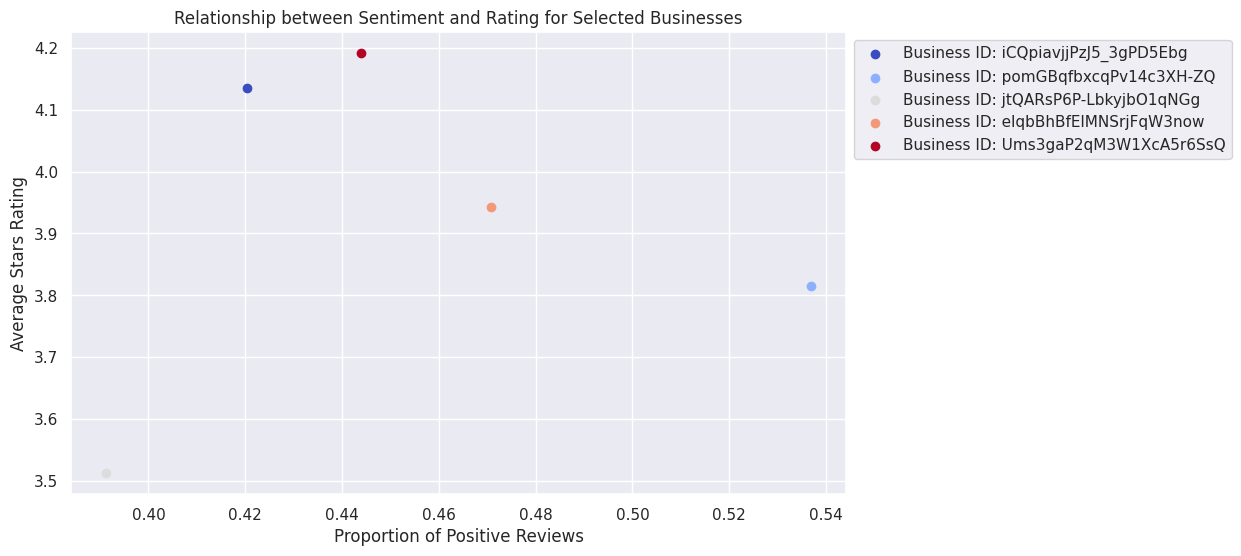

In [33]:
# Extract data from the results DataFrame
business_ids = results_df["business_id"].to_list()
proportion_positive_list = results_df["proportion_positive"].to_list()
average_stars_list = results_df["average_stars"].to_list()

# Define colors for different businesses
colors = plt.cm.coolwarm(
    np.linspace(0, 1, len(business_ids))
)  # Use viridis colormap

plt.figure(figsize=(10, 6))

# Plot all data points with different colors
for i, (business_id, proportion_positive, average_stars) in enumerate(zip(business_ids, proportion_positive_list, average_stars_list)):
  plt.scatter(
      proportion_positive, average_stars, marker="o", color=colors[i], label=f"Business ID: {business_id}"
  )

# Add labels, title, and grid lines
plt.xlabel("Proportion of Positive Reviews")
plt.ylabel("Average Stars Rating")
plt.title("Relationship between Sentiment and Rating for Selected Businesses")
plt.grid(True)

# Add legend
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


* Positive Reviews vs. Rating:<br> 
There appears to be a positive correlation between the proportion of positive reviews and the average star rating. Generally, as the proportion of positive reviews increases, the average star rating also tends to increase.
 
* High Rating with Lower Proportion of Positive Reviews: <br> 
The business with the Business ID iCQpiavjjPzJ5_3gPD5Ebg (blue dot) has a higher star rating of just above 4.1, despite having a lower proportion of positive reviews (around 0.41).
 
* Lower Rating with Higher Proportion of Positive Reviews: <br> 
Conversely, the business with the Business ID jtQARsP6P-LkbyjqO1qNGg (orange dot) has a slightly lower average star rating (just below 4.0) even though it has a higher proportion of positive reviews (approximately 0.45).
<br> 
The business represented by the grey dot at the bottom left has the lowest average star rating and the lowest proportion of positive reviews. This might indicate either a consistently low performance or a small sample size of reviews. Conversely, the business with the Business ID Um3sgaP2qM3W1XcA5r65sQ (red dot) has the highest proportion of positive reviews but does not have the highest average star rating, which could suggest that while most reviews are positive, they might not be strong enough to push the rating to the highest level.